In [43]:
# set up 
lunarc = 0
seed_data = 7
nbr_rounds = 5 

import os

print(os.getcwd())

# set the wd to the base folder for the project
os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/mv_gaussian')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np
import random

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/mv_gaussian
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/mv_gaussian


In [44]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

# this func. is used to read both the posteiro sames and the data samples 
def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")

In [45]:
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1
seed_max = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [46]:
nbr_data_hp_tuning = 10
nbr_round = 10

# Five obs 

In [47]:
snl_res = np.zeros((14, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_five_obs/hp_tuning/snl_' + id_job + '.txt'
    snl_res[:,i] = read_res_file(p)

In [48]:
snpec_res = np.zeros((14, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_five_obs/hp_tuning/snpec_' + id_job + '.txt'
    snpec_res[:,i] = read_res_file(p)

In [49]:
snpla_res = np.zeros((17, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_five_obs/hp_tuning/snpla_' + id_job + '.txt'
    snpla_res[:,i] = read_res_file(p)

In [50]:
snreb_res = np.zeros((14, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_five_obs/hp_tuning/snre_b_' + id_job + '.txt'
    snreb_res[:,i] = read_res_file(p)

In [51]:
print("Nbr NaN SNL: " + str(np.isnan(snl_res[-1,:]).sum()))
print("Nbr NaN SNPE-C: " + str(np.isnan(snpec_res[-1,:]).sum()))
print("Nbr NaN SNPLA: " + str(np.isnan(snpla_res[-1,:]).sum()))
print("Nbr NaN SNRE-B: " + str(np.isnan(snreb_res[-1,:]).sum()))

snl_res = snl_res[:, ~np.isnan(snl_res).any(axis=0)]
snpec_res = snpec_res[:, ~np.isnan(snpec_res).any(axis=0)]
snpla_res = snpla_res[:, ~np.isnan(snpla_res).any(axis=0)]
snreb_res = snreb_res[:, ~np.isnan(snreb_res).any(axis=0)]

Nbr NaN SNL: 0
Nbr NaN SNPE-C: 0
Nbr NaN SNPLA: 0
Nbr NaN SNRE-B: 0


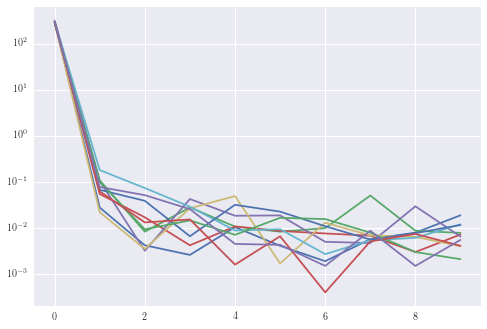

In [52]:
plt.figure()
plt.plot(snl_res[-1-nbr_round:-1, :]);
plt.yscale('log')

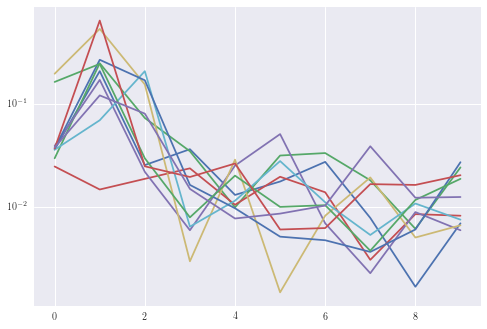

In [53]:
plt.figure()
plt.plot(snpec_res[-1-nbr_round:-1, :]);
plt.yscale('log')

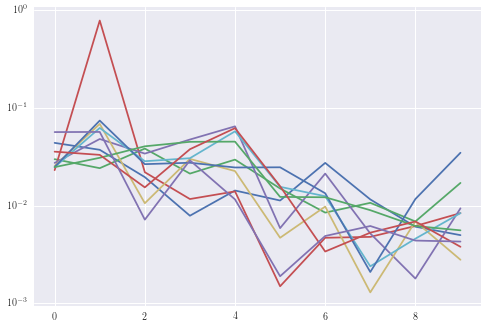

In [54]:
plt.figure()
plt.plot(snpla_res[-1-nbr_round:-1, :]);
plt.yscale('log')

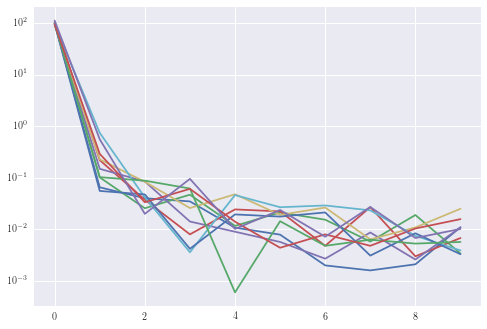

In [55]:
plt.figure()
plt.plot(snreb_res[-1-nbr_round:-1, :]);
plt.yscale('log')

In [56]:
print("Optimla hp for SNL: " + str(snl_res[1,np.argmin(snl_res[-1, :])]))
print("Optimla hp for SNPE-C: " + str(snpec_res[1,np.argmin(snpec_res[-1, :])]))
print("Optimla hp for SNPLA: " + str(snpla_res[1:5,np.argmin(snpla_res[-1, :])]))
print("Optimla hp for SNRE-B: " + str(snreb_res[1,np.argmin(snreb_res[-1, :])]))

Optimla hp for SNL: 0.005396
Optimla hp for SNPE-C: 0.006019
Optimla hp for SNPLA: [1.42000e-04 1.14500e-03 8.56883e-01 6.58086e-01]
Optimla hp for SNRE-B: 0.006185


In [57]:
print("SNL:")
print("Min: " + str(np.min(snl_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snl_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snl_res[-1, :])))
print("---")
print("SNPE-C:")
print("Min: " + str(np.min(snpec_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpec_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpec_res[-1, :])))
print("---")
print("SNPLA:")
print("Min: " + str(np.min(snpla_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpla_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpla_res[-1, :])))
print("---")
print("SNRE-B:")
print("Min: " + str(np.min(snreb_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snreb_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snreb_res[-1, :])))

SNL:
Min: 0.0031
Q1, Q2, Q3: [0.006175 0.0097   0.014025]
Max: 0.0174
---
SNPE-C:
Min: 0.002
Q1, Q2, Q3: [0.004625 0.00665  0.0095  ]
Max: 0.0223
---
SNPLA:
Min: 0.0003
Q1, Q2, Q3: [0.00415 0.00675 0.01035]
Max: 0.0226
---
SNRE-B:
Min: 0.002
Q1, Q2, Q3: [0.00425  0.00815  0.008825]
Max: 0.0199


In [58]:
print((0.75*np.diff(np.quantile(snl_res[-1, :], [0.25, 0.75]))/np.quantile(snl_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpec_res[-1, :], [0.25, 0.75]))/np.quantile(snpec_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpla_res[-1, :], [0.25, 0.75]))/np.quantile(snpla_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snreb_res[-1, :], [0.25, 0.75]))/np.quantile(snreb_res[-1, :], [0.5])).round(3))


[0.607]
[0.55]
[0.689]
[0.421]


In [17]:
print(np.quantile(snl_res[-1, :], [0.5]).round(3))
print(np.quantile(snpec_res[-1, :], [0.5]).round(3))
print(np.quantile(snpla_res[-1, :], [0.5]).round(3))
print(np.quantile(snreb_res[-1, :], [0.5]).round(3))
print("---")
print(np.diff(np.quantile(snl_res[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snpec_res[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snpla_res[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snreb_res[-1, :], [0.25, 0.75])).round(3))


[0.01]
[0.007]
[0.007]
[0.008]
---
[0.008]
[0.005]
[0.006]
[0.005]


In [56]:
np.diff([2,5])

array([3])

# summary stats

In [59]:
snl_res = np.zeros((14, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_summary_stats/hp_tuning/snl_' + id_job + '.txt'
    snl_res[:,i] = read_res_file(p)

In [60]:
snpec_res = np.zeros((14, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_summary_stats/hp_tuning/snpec_' + id_job + '.txt'
    snpec_res[:,i] = read_res_file(p)

In [61]:
snpla_res = np.zeros((17, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_summary_stats/hp_tuning/snpla_' + id_job + '.txt'
    snpla_res[:,i] = read_res_file(p)

In [62]:
snreb_res = np.zeros((14, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_summary_stats/hp_tuning/snre_b_' + id_job + '.txt'
    snreb_res[:,i] = read_res_file(p)

In [63]:
print("Nbr NaN SNL: " + str(np.isnan(snl_res[-1,:]).sum()))
print("Nbr NaN SNPE-C: " + str(np.isnan(snpec_res[-1,:]).sum()))
print("Nbr NaN SNPLA: " + str(np.isnan(snpla_res[-1,:]).sum()))
print("Nbr NaN SNRE-B: " + str(np.isnan(snreb_res[-1,:]).sum()))

snl_res = snl_res[:, ~np.isnan(snl_res).any(axis=0)]
snpec_res = snpec_res[:, ~np.isnan(snpec_res).any(axis=0)]
snpla_res = snpla_res[:, ~np.isnan(snpla_res).any(axis=0)]
snreb_res = snreb_res[:, ~np.isnan(snreb_res).any(axis=0)]

Nbr NaN SNL: 0
Nbr NaN SNPE-C: 0
Nbr NaN SNPLA: 0
Nbr NaN SNRE-B: 0


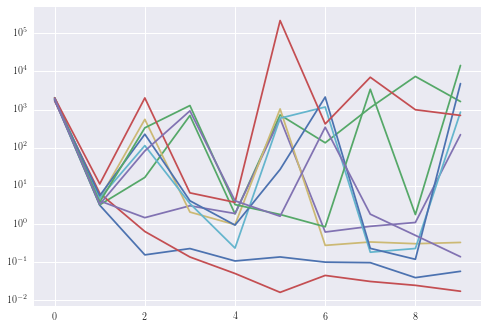

In [64]:
plt.figure()
plt.plot(snl_res[-1-nbr_round:-1, :]);
plt.yscale('log')

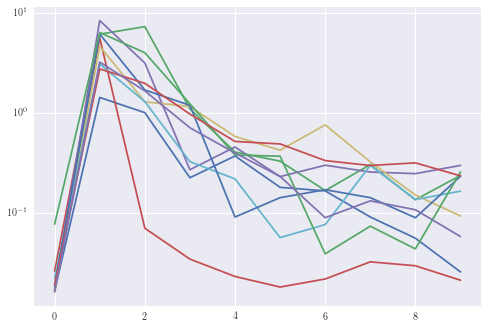

In [65]:
plt.figure()
plt.plot(snpec_res[-1-nbr_round:-1, :]);
plt.yscale('log')

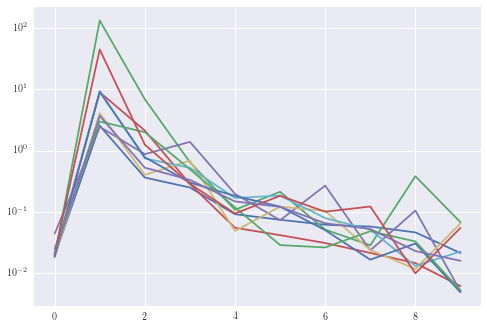

In [66]:
plt.figure()
plt.plot(snpla_res[-1-nbr_round:-1, :]);
plt.yscale('log')

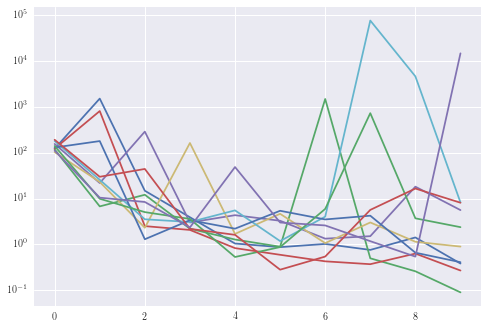

In [67]:
plt.figure()
plt.plot(snreb_res[-1-nbr_round:-1, :]);
plt.yscale('log')

In [68]:
print("Optimla hp for SNL: " + str(snl_res[1,np.argmin(snl_res[-1, :])]))
print("Optimla hp for SNPE-C: " + str(snpec_res[1,np.argmin(snpec_res[-1, :])]))
print("Optimla hp for SNPLA: " + str(snpla_res[1:5,np.argmin(snpla_res[-1, :])]))
print("Optimla hp for SNRE-B: " + str(snreb_res[1,np.argmin(snreb_res[-1, :])]))

Optimla hp for SNL: 0.000142
Optimla hp for SNPE-C: 0.000142
Optimla hp for SNPLA: [0.004635 0.00488  0.862187 0.834507]
Optimla hp for SNRE-B: 0.000142


In [69]:
print("SNL:")
print("Min: " + str(np.min(snl_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snl_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snl_res[-1, :])))
print("---")
print("SNPE-C:")
print("Min: " + str(np.min(snpec_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpec_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpec_res[-1, :])))
print("---")
print("SNPLA:")
print("Min: " + str(np.min(snpla_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpla_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpla_res[-1, :])))
print("---")
print("SNRE-B:")
print("Min: " + str(np.min(snreb_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snreb_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snreb_res[-1, :])))

SNL:
Min: 0.0182
Q1, Q2, Q3: [1.43325000e-01 6.12300000e-01 6.25769375e+02]
Max: 11381.3668
---
SNPE-C:
Min: 0.0226
Q1, Q2, Q3: [0.074475 0.11445  0.1466  ]
Max: 0.3265
---
SNPLA:
Min: 0.0058
Q1, Q2, Q3: [0.01645  0.02705  0.047125]
Max: 0.256
---
SNRE-B:
Min: 0.3741
Q1, Q2, Q3: [0.680725 3.68     5.225025]
Max: 16.0508


In [70]:
print((0.75*np.diff(np.quantile(snl_res[-1, :], [0.25, 0.75]))/np.quantile(snl_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpec_res[-1, :], [0.25, 0.75]))/np.quantile(snpec_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpla_res[-1, :], [0.25, 0.75]))/np.quantile(snpla_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snreb_res[-1, :], [0.25, 0.75]))/np.quantile(snreb_res[-1, :], [0.5])).round(3))


[766.323]
[0.473]
[0.851]
[0.926]


In [30]:
print(np.quantile(snl_res[-1, :], [0.5]).round(3))
print(np.quantile(snpec_res[-1, :], [0.5]).round(3))
print(np.quantile(snpla_res[-1, :], [0.5]).round(3))
print(np.quantile(snreb_res[-1, :], [0.5]).round(3))
print("---")
print(np.diff(np.quantile(snl_res[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snpec_res[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snpla_res[-1, :], [0.25, 0.75])).round(3))
print(np.diff(np.quantile(snreb_res[-1, :], [0.25, 0.75])).round(3))


[0.612]
[0.114]
[0.027]
[3.68]
---
[625.626]
[0.072]
[0.031]
[4.544]


# learnable summary stats

In [71]:
snl_res = np.zeros((14, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_learnable_summary_stats/hp_tuning/snl_' + id_job + '.txt'
    snl_res[:,i] = read_res_file(p)

In [74]:
snpec_res = np.zeros((14, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_learnable_summary_stats/hp_tuning/snpec_' + id_job + '.txt'
    snpec_res[:,i] = read_res_file(p)

In [73]:
snpla_res = np.zeros((17, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_learnable_summary_stats/hp_tuning/snpla_' + id_job + '.txt'
    snpla_res[:,i] = read_res_file(p)

In [75]:
snreb_res = np.zeros((14, nbr_data_hp_tuning))

for i in range(nbr_data_hp_tuning):
    id_job = str(2) + '_' + str(11) + '_' + str(10) + "_" + str(i+1)
    p = 'low_dim_w_learnable_summary_stats/hp_tuning/snre_b_' + id_job + '.txt'
    snreb_res[:,i] = read_res_file(p)

In [76]:
print("Nbr NaN SNL: " + str(np.isnan(snl_res[-1,:]).sum()))
print("Nbr NaN SNPE-C: " + str(np.isnan(snpec_res[-1,:]).sum()))
print("Nbr NaN SNPLA: " + str(np.isnan(snpla_res[-1,:]).sum()))
print("Nbr NaN SNRE-B: " + str(np.isnan(snreb_res[-1,:]).sum()))

snl_res = snl_res[:, ~np.isnan(snl_res).any(axis=0)]
snpec_res = snpec_res[:, ~np.isnan(snpec_res).any(axis=0)]
snpla_res = snpla_res[:, ~np.isnan(snpla_res).any(axis=0)]
snreb_res = snreb_res[:, ~np.isnan(snreb_res).any(axis=0)]

Nbr NaN SNL: 0
Nbr NaN SNPE-C: 0
Nbr NaN SNPLA: 1
Nbr NaN SNRE-B: 0


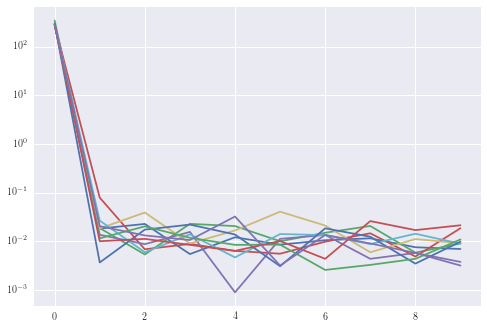

In [36]:
plt.figure()
plt.plot(snl_res[-1-nbr_round:-1, :]);
plt.yscale('log')

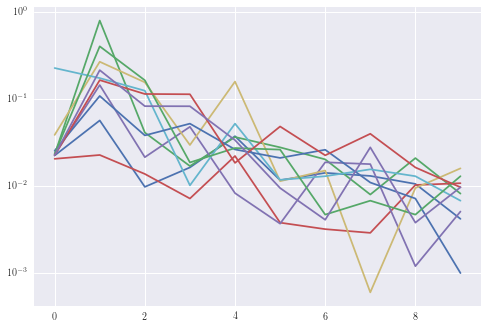

In [37]:
plt.figure()
plt.plot(snpec_res[-1-nbr_round:-1, :]);
plt.yscale('log')

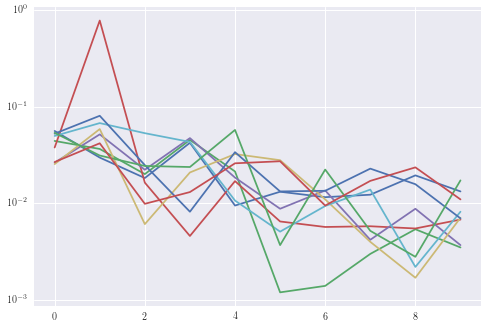

In [38]:
plt.figure()
plt.plot(snpla_res[-1-nbr_round:-1, :]);
plt.yscale('log')

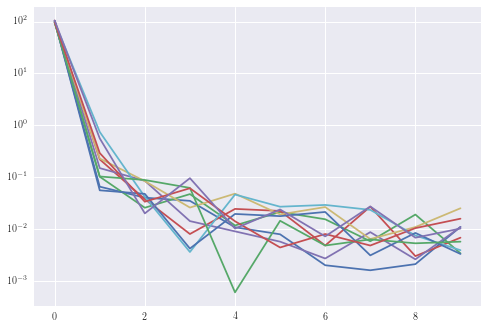

In [39]:
plt.figure()
plt.plot(snreb_res[-1-nbr_round:-1, :]);
plt.yscale('log')

In [77]:
print("Optimla hp for SNL: " + str(snl_res[1,np.argmin(snl_res[-1, :])]))
print("Optimla hp for SNPE-C: " + str(snpec_res[1,np.argmin(snpec_res[-1, :])]))
print("Optimla hp for SNPLA: " + str(snpla_res[1:5,np.argmin(snpla_res[-1, :])]))
print("Optimla hp for SNRE-B: " + str(snreb_res[1,np.argmin(snreb_res[-1, :])]))

Optimla hp for SNL: 0.006019
Optimla hp for SNPE-C: 0.006185
Optimla hp for SNPLA: [0.006592 0.00309  0.895499 0.883212]
Optimla hp for SNRE-B: 0.006185


In [78]:
print("SNL:")
print("Min: " + str(np.min(snl_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snl_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snl_res[-1, :])))
print("---")
print("SNPE-C:")
print("Min: " + str(np.min(snpec_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpec_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpec_res[-1, :])))
print("---")
print("SNPLA:")
print("Min: " + str(np.min(snpla_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snpla_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snpla_res[-1, :])))
print("---")
print("SNRE-B:")
print("Min: " + str(np.min(snreb_res[-1, :])))
print("Q1, Q2, Q3: " + str(np.quantile(snreb_res[-1, :], [0.25, 0.5, 0.75])))
print("Max: " + str(np.max(snreb_res[-1, :])))

SNL:
Min: 0.002
Q1, Q2, Q3: [0.0055   0.0087   0.013025]
Max: 0.0253
---
SNPE-C:
Min: 0.001
Q1, Q2, Q3: [0.006575 0.01065  0.011475]
Max: 0.0287
---
SNPLA:
Min: 0.0009
Q1, Q2, Q3: [0.0028 0.0037 0.0055]
Max: 0.0129
---
SNRE-B:
Min: 0.002
Q1, Q2, Q3: [0.00425  0.00815  0.008825]
Max: 0.0199


In [79]:
print((0.75*np.diff(np.quantile(snl_res[-1, :], [0.25, 0.75]))/np.quantile(snl_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpec_res[-1, :], [0.25, 0.75]))/np.quantile(snpec_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snpla_res[-1, :], [0.25, 0.75]))/np.quantile(snpla_res[-1, :], [0.5])).round(3))
print((0.75*np.diff(np.quantile(snreb_res[-1, :], [0.25, 0.75]))/np.quantile(snreb_res[-1, :], [0.5])).round(3))


[0.649]
[0.345]
[0.547]
[0.421]
